Universidade Federal de Santa Catarina<br>
Departamento de Engenharia Elétrica e Eletrônica<br>
EEL7514/EEL7513 - Introdução ao Aprendizado de Máquina
$\newcommand{\bX}{\mathbf{X}}$
$\newcommand{\bw}{\mathbf{w}}$
$\newcommand{\by}{\mathbf{y}}$
$\newcommand{\bx}{\mathbf{x}}$
$\newcommand{\RR}{\mathbb{R}}$
$\newcommand{\calS}{\mathcal{S}}$

## Luiz Eduardo Hupalo (17203887)


# Exercício 7: Redes Neurais II

Neste exercício você irá construir modelos de redes neurais para realizar classificação e experimentar diversas configurações de hiperparâmetros.

In [11]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def plot_data(X, y, colors=['bo','rx','gs','md','c^','yP']):
    ''' Plot 1-D or 2-D classification dataset '''
    assert len(X.shape) == 2 and len(y.shape) == 1
    classes = np.unique(y)
    assert len(classes) <= len(colors)
    dim = X.shape[1]
    assert 0 < dim <= 2
    if dim == 1:
        for i in range(len(classes)):
            plt.plot(X[y==classes[i],0],np.zeros(np.sum(y==classes[i])),colors[i])
        plt.gca().axes.get_yaxis().set_ticks([])
    else:
        for i in range(len(classes)):
            plt.plot(X[y==classes[i],0],X[y==classes[i],1],colors[i])
    return

def plot_boundary(model, X, colors=['b','r','g','m','c','y'], N=400, gap=1e-9):
    ''' Plot boundary for a 1-D or 2-D classifier '''
    assert len(X.shape) == 2
    dim = X.shape[1]
    assert 0 < dim <= 2
    x1_min, x1_max = X[:,0].min()-gap, X[:,0].max()+gap
    if dim == 1:
        x2_min, x2_max = -1, 1
        N2 = 2
    else:
        x2_min, x2_max = X[:,1].min()-gap, X[:,1].max()+gap
        N2 = N
    xx1, xx2 = np.meshgrid(np.linspace(x1_min,x1_max,N), np.linspace(x2_min,x2_max,N2))
    if dim == 1:
        X = np.c_[xx1.reshape(-1)]
    else:
        X = np.c_[xx1.reshape(-1), xx2.reshape(-1)]
    y_pred = model.predict(X)
    from sklearn.preprocessing import LabelEncoder
    enc = LabelEncoder()
    y_pred = enc.fit_transform(y_pred)
    assert len(enc.classes_) <= len(colors)
    levels = np.arange(len(enc.classes_)+1)-0.5
    y_pred = y_pred.reshape(xx1.shape)
    plt.contourf(xx1,xx2,y_pred,levels,colors=colors,alpha=0.25)
    plt.contour(xx1,xx2,y_pred,levels,colors='k',linewidths=1)
    return

# Conjunto de dados #1

Para "aquecer", vamos começar utilizando o conjunto XOR do exercício anterior.

(300, 2) (300,)
(100, 2) (100,)


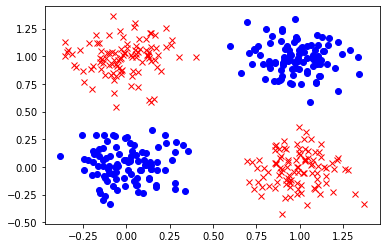

In [12]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
X, y = make_blobs(n_samples=400, n_features=2, centers=[[0,0],[1,1],[0,1],[1,0]], cluster_std=0.15, random_state=0)
y = (y >= 2).astype(int)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/4, random_state=0)

plot_data(X,y)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

## Tarefas

- Treine uma rede neural de 2 camadas (1 oculta) para classificação usando os métodos de treinamento SGD e ADAM. Utilize primeiramente a biblioteca sklearn. Certifique-se de usar uma taxa de aprendizagem adequada.
- Repita o item anterior usando [Keras](https://keras.io/), com [TensorFlow](https://www.tensorflow.org/) como backend.

### Dicas
- Para instalar Keras 2.2.5 ou 2.3.0 (multi-backend) e TensorFlow 1.14.0 (como backend), digite no prompt de comando:
```python
pip install tensorflow
pip install keras
```
Confirme as versões das bibliotecas digitando
```python
import keras
import tensorflow as tf
print(keras.__version__)
print(tf.__version__)
```
- Alternativamente, você pode instalar apenas o TensorFlow (possivelmente a versão 2.0) e obter o Keras através do módulo `tensorflow.keras`. Porém, nesse caso a sintaxe da importação de módulos do Keras será diferente do convencional: você necessariamente terá que utilizar
```python
from tensorflow.keras.? import ?
```
ao invés de simplesmente
```python
from keras.? import ?
```
Em particular, a abreviação `tf` não funciona na importação de módulos.
- Caso deseje, ao invés de rodar localmente em sua máquina, você pode utilizar o serviço em nuvem gratuito [Google Colab](https://colab.research.google.com).
- Ao rodar pela primeira vez o Keras/Tensorflow, é possível que você observe alguns _warnings_. Pode ignorá-los, pois não afetam o funcionamento e desaparecem após a primeira utilização.
- Leia a documentação do Keras para aprender a utilizá-lo. Em particular, o modelo mais simples possível envolve as funções
```python
keras.models.Sequential # modelo de rede neural feed-forward (em camadas)
keras.layers.Dense # camada oculta ou de saída da rede neural
```
bem como a escolha apropriada da função [perda](https://keras.io/losses/) e das funções de [ativação](https://keras.io/activations/).
- No Keras, ao contrário do sklearn, é necessário especificar explicitamente a camada de saída, sua função de ativação, e a função perda utilizada. (No sklearn, essa escolha é automática a partir dos valores encontrados em `y_train`.) 
- Para verificar a curva de perda no treinamento, você pode utilizar `model.loss_curve_` no sklearn. No Keras, utilize 

```python
history = model.fit(...)
history.history['loss']
```
- Para configurar a taxa de aprendizado no Keras, é necessário instanciar um [otimizador](https://keras.io/optimizers/):
```python
from keras.optimizers import SGD
model.compile(optimizer=SGD(lr=...), ...)
``` 
- Note que o parâmetro `max_iter` no sklearn corresponde ao número de **épocas**, não necessariamente ao número de atualizações de pesos.
- No Keras, o método `model.summary()` fornece uma descrição de todas as camadas da rede neural.

In [13]:
import keras
import tensorflow as tf
print(keras.__version__)
print(tf.__version__)

2.9.0
2.9.1


In [14]:
import pandas as pd
from scipy.io import loadmat
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPRegressor
from scipy.special import expit as sigmoid

import h5py
import time

import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.nn import relu, softmax
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import normalize
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.optimizers import Adam, SGD

#from keras.regularizers import kernel_regularizer
#from keras.regularizers.Regularizer import bias_regularizer
#from keras.regularizers.Regularizer import activity_regularizer
from keras import regularizers

In [15]:
def plot_data(X, y):
    ''' Plot 2-D binary dataset '''
    if len(y.shape) > 1: raise RuntimeError('y must be a 1-D array')
    plt.plot(X[y!=1,0],X[y!=1,1],'bo',X[y==1,0],X[y==1,1],'rx')
    return

def plot_boundary(model, X, N=100):
    ''' Plot boundary for a 2-D binary classifier '''
    from scipy.special import logit
    x1 = np.linspace(X[:,0].min(), X[:,0].max(), N)
    x2 = np.linspace(X[:,1].min(), X[:,1].max(), N)
    xx1, xx2 = np.meshgrid(x1, x2)
    X = np.c_[xx1.reshape(-1), xx2.reshape(-1)]
    z = logit(model.predict_proba(X)[:,1].reshape(xx1.shape))
    plt.contourf(xx1,xx2,np.sign(z),cmap=plt.cm.bwr,vmin=-3,vmax=3)
    plt.contour(xx1,xx2,z,cmap=plt.cm.gray,vmin=np.inf,vmax=np.inf,levels=[0])

Rede neural de 2 camadas para classificação utilizando SGD da sklearn:

Train accuracy: 1.0
Test accuracy: 1.0


/home/luiz/codigos/estudos_ml/jupyterenv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


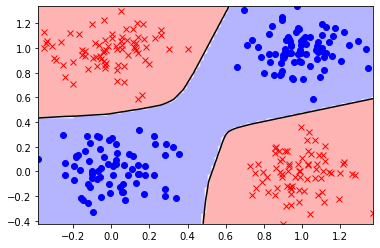

In [16]:
model = MLPClassifier(hidden_layer_sizes=(20,20,), activation='relu', solver='sgd',alpha = 0.1,learning_rate_init=0.1,learning_rate='adaptive', max_iter=100)
model.fit(X_train, y_train)
plot_boundary(model, X_train)
plot_data(X_train, y_train)
print('Train accuracy:',model.score(X_train, y_train))
print('Test accuracy:',model.score(X_test, y_test))

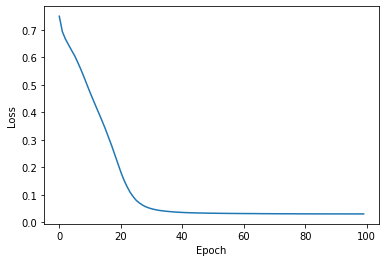

In [17]:
plt.plot(model.loss_curve_)
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

Rede neural de 2 camadas para classificação utilizando ADAM do sklearn:

Train accuracy: 1.0
Test accuracy: 1.0


/home/luiz/codigos/estudos_ml/jupyterenv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


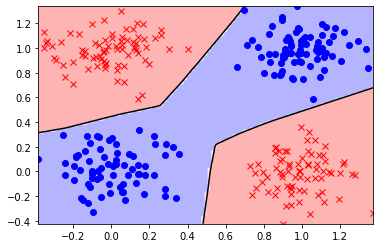

In [18]:
model = MLPClassifier(hidden_layer_sizes=(20,20,), activation='relu', solver='adam',alpha = 0.1,learning_rate_init=0.1,learning_rate='adaptive', max_iter=30)
model.fit(X_train, y_train)
plot_boundary(model, X_train)
plot_data(X_train, y_train)
print('Train accuracy:',model.score(X_train, y_train))
print('Test accuracy:',model.score(X_test, y_test))

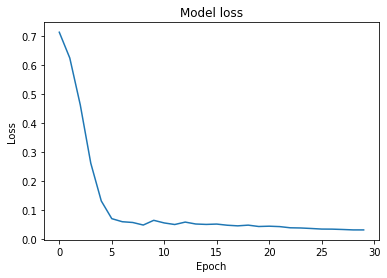

In [19]:
plt.plot(model.loss_curve_)
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

O segundo método convergiu mais rápido.

Agora, utilizando SGD do Keras:

In [20]:
learning_rate = [0.0001, 0.001, 0.01, 0.1]
for rate in learning_rate:
    label = f"learning rate-{rate}"
    print(label)
    
    model = Sequential()

    model.add(Dense(50, input_shape=X_train.shape[1:], activation='relu'))

    model.add(Dense(50, activation='relu'))

    model.add(Dense(1, activation='sigmoid'))


    sgd = SGD(lr=rate)

    model.compile(optimizer=sgd,
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    history = model.fit(X_train, y_train,
              batch_size=30,
              epochs=10,
              validation_data=(X_test,y_test))
    
    # Plot training & validation accuracy values
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

learning rate-0.0001
Epoch 1/10
 1/10 [==>...........................] - ETA: 1s - loss: 0.6821 - accuracy: 0.5000

/home/luiz/codigos/estudos_ml/jupyterenv/lib/python3.8/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


10/10 [==============================] - 0s 9ms/step - loss: 0.6928 - accuracy: 0.4967 - val_loss: 0.6725 - val_accuracy: 0.5100
Epoch 2/10
10/10 [==============================] - 0s 2ms/step - loss: 0.6927 - accuracy: 0.4967 - val_loss: 0.6724 - val_accuracy: 0.5100
Epoch 3/10
10/10 [==============================] - 0s 2ms/step - loss: 0.6926 - accuracy: 0.4967 - val_loss: 0.6724 - val_accuracy: 0.5100
Epoch 4/10
10/10 [==============================] - 0s 3ms/step - loss: 0.6925 - accuracy: 0.4967 - val_loss: 0.6723 - val_accuracy: 0.5100
Epoch 5/10
10/10 [==============================] - 0s 3ms/step - loss: 0.6925 - accuracy: 0.4967 - val_loss: 0.6723 - val_accuracy: 0.5100
Epoch 6/10
10/10 [==============================] - 0s 2ms/step - loss: 0.6924 - accuracy: 0.4967 - val_loss: 0.6722 - val_accuracy: 0.5100
Epoch 7/10
10/10 [==============================] - 0s 2ms/step - loss: 0.6923 - accuracy: 0.4967 - val_loss: 0.6722 - val_accuracy: 0.5100
Epoch 8/10
10/10 [=============

KeyError: 'acc'